# Keras API Lending-Club Project

I will be using Lending Club dataset from kaggle https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

# Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

# Columns and their Meanings

loan_amnt : The listed amount of the loan applied for by the borrower.

term : The number of payments on the loan. Values are in months.

int_rate : Interest Rate on the loan.

installment : The monthly payment owed by the borrower if the loan originates.

grade : Lending-Club assigned loan grade.

sub_grade : Lending-Club assigned subgrade.

emp_title : The job title of the borrower.

emp_length : Employement length in years.

home_ownership : The home ownership status (OWN,RENT,MORTGAGE,OTHER).

annual_inc : The self-reported annual income.

verification_status : Indicates if the annual income was verified by the Lending-Club or not.

issue_d : The month which the loan was funded.

loan_status : Current status of the loan.

purpose : A category provided by the borrower for the loan request.

title : The loan title provided by the borrower.

zip_code : The first three numbers of the zip code provided by the borrower for the loan request.

addr_state : The state provided by the borrower in the loan request.

dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage          and the requested LC loan, divided by the borrower’s self-reported monthly income.

earliest_cr_line : The month the borrower's earliest reported credit line was opened.

open_acc : The number of open credit lines in the borrower's credit file.

pub_rec : Number of derogatory public records.

revol_bal : Total credit revolving balance.

revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc : The total number of credit lines currently in the borrower's credit file.

initial_list_status : The initial listing status of the loan. Possible values are – W, F.

application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers.

mort_acc : Number of mortgage accounts.

pub_rec_bankruptcies : Number of public record bankruptcies.

# Creating a function that will describe a column

In [97]:
import pandas as pd
data_info=pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [98]:
print(data_info.loc['int_rate']['Description'])

Interest Rate on the loan


In [99]:
def feat_info(column_name) :
    print(data_info.loc[column_name]['Description'])

In [100]:
#user-defined function which describes the column
feat_info('int_rate')

Interest Rate on the loan


# Necessary Imports and Loading the data 

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [236]:
df=pd.read_csv('lending_club_loan_two.csv')

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [238]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Exploratory Data Analysis 

Let's see how many loans are fully paid and how many were charged off

<AxesSubplot:xlabel='loan_status', ylabel='count'>

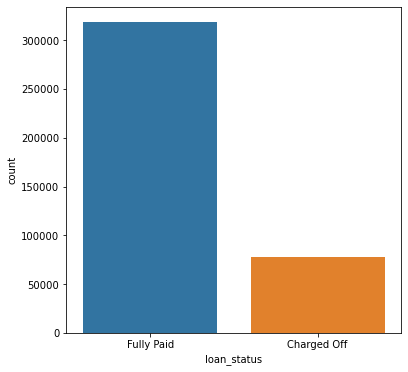

In [239]:
plt.figure(figsize=(6,6))
sns.countplot(x='loan_status',data=df)

The loan amount variations

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

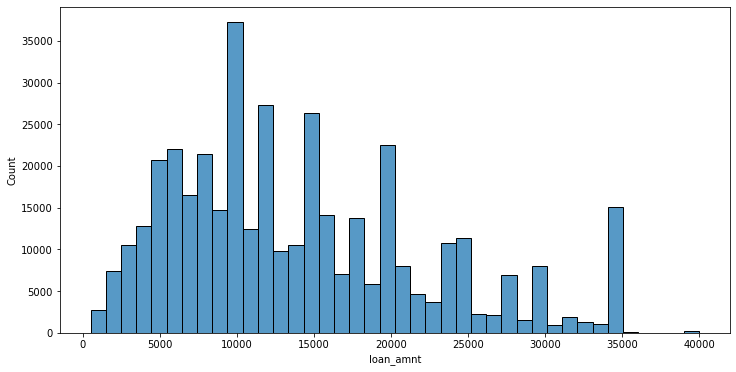

In [240]:
plt.figure(figsize=(12,6))
sns.histplot(x='loan_amnt',data=df,bins=40)

Finding correlations between features

In [241]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

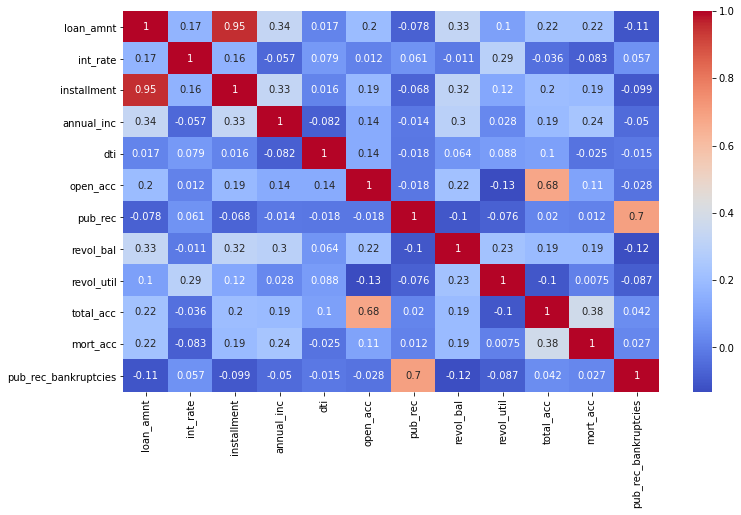

In [242]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

We can see their is a perfect correlation between loan amount and the installment

In [243]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [244]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

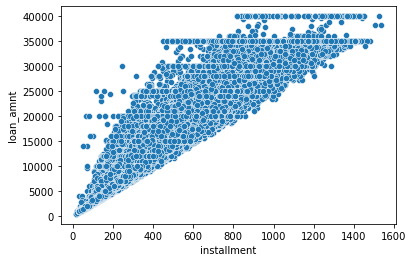

In [245]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

Finding relationship between loan status and loan amount

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

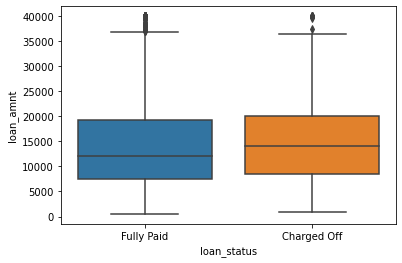

In [246]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [247]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let's explore the grade and sub_grade features in the dataset

In [248]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [249]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [250]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

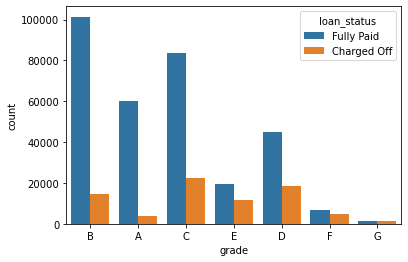

In [251]:
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='grade', ylabel='count'>

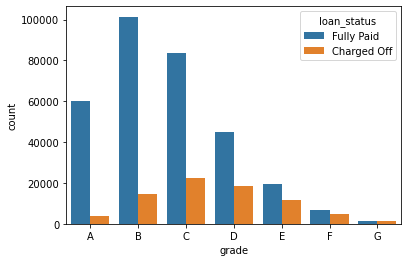

In [252]:
grade_order=sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,order=grade_order,hue='loan_status')

Finding relaionship between sub grades and loan_status

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

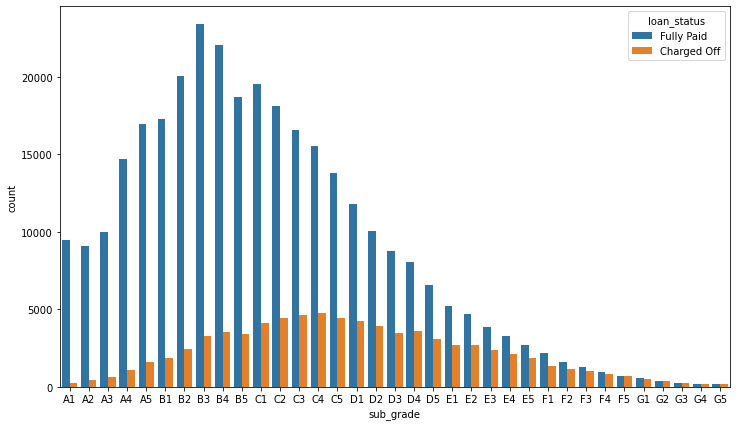

In [253]:
plt.figure(figsize=(12,7))
sub_grade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=sub_grade_order,hue='loan_status')

It looks like F and G subgrades don't get paid back that often.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

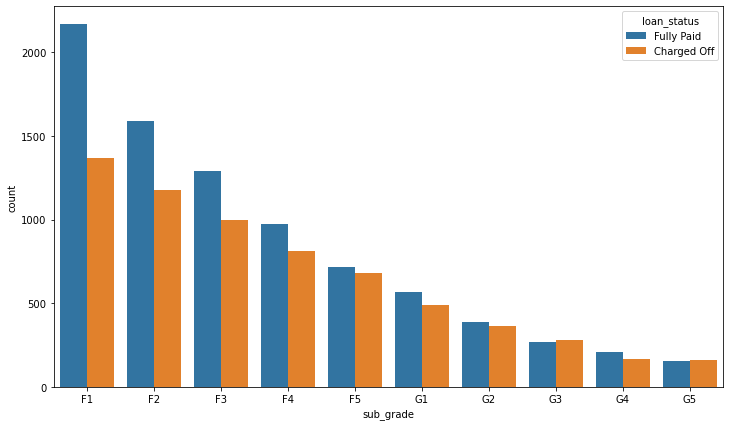

In [254]:
plt.figure(figsize=(12,7))
ndf=df[(df['grade']=='G') | (df['grade']=='F')]
sub_grade_order=sorted(ndf['sub_grade'].unique())
sns.countplot(x='sub_grade',data=ndf,order=sub_grade_order,hue='loan_status')

Creating a new column loan_repaid which will contain a 1 if the loan was fully paid and 0 if the loan was charged off

In [255]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [256]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [257]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.

<AxesSubplot:>

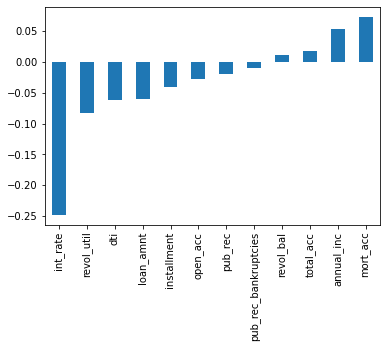

In [258]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data Preprocessing

Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [259]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

In [260]:
len(df)

396030

Finding out total number of missing data in each column

In [261]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Let's see what percentage of data in a column is null

In [262]:
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Let's examine emp_title and emp_length to see whether it will be okay to drop them.

In [263]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [264]:
df['emp_title'].nunique()

173105

We can see that there are 173105 different emp_titles creating that many dummy column will not be beneficial. Let's drop the emp_title column then.

In [265]:
df=df.drop('emp_title',axis=1)

In [266]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1


Now let's shift our focus to emp_length

In [267]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [268]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

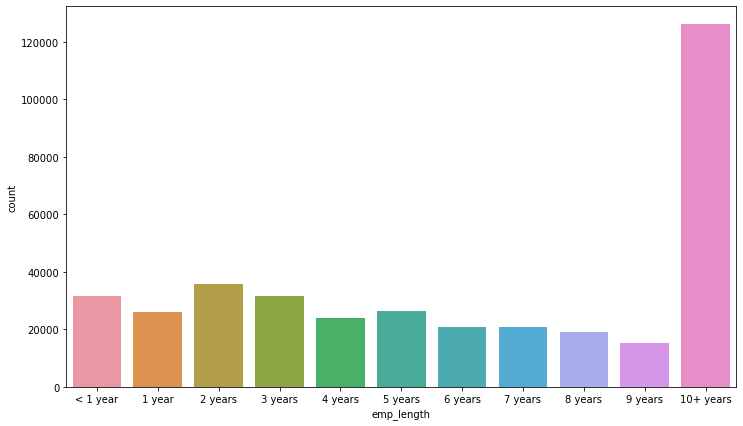

In [269]:
plt.figure(figsize=(12,7))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

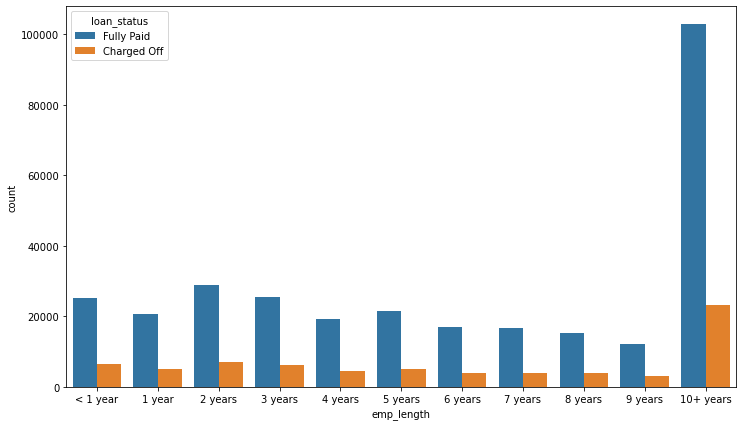

In [270]:
plt.figure(figsize=(12,7))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

We didn't find any strong relationship between emp_length and the loan_status. Let's find out the percentage of borrowers who were charged off from each emp_length

In [271]:
emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [272]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [273]:
emp_len=emp_co/emp_fp

In [274]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

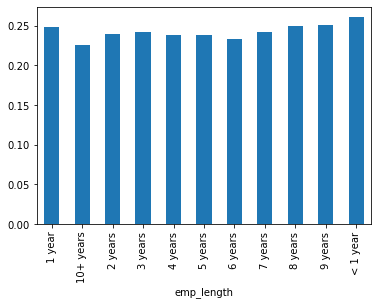

In [275]:
emp_len.plot(kind='bar')

Charge Off rates are almost similar in every emp_length so i have decided to drop this column

In [276]:
df=df.drop('emp_length',axis=1)

In [277]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1


In [278]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Let's fix the title column

In [279]:
df[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


We can see that both the columns title and purpose are almost similar and the purpose column has zero null values. So we can drop the title column.

In [280]:
df=df.drop('title',axis=1)

In [281]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1


Let's focus on mort_acc column now :

In [282]:
feat_info('mort_acc')

Number of mortgage accounts.


In [283]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

Let's find out which column/feature is correlated with mort_acc column.

In [284]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.

In [285]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

 Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.

In [286]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [287]:
total_acc_avg[2.0]

0.0

In [288]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [289]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [290]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Let's focus on revol_util and pub_rec_bankruptcies columns

In [291]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [292]:
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Columns revol_util and pub_rec_bankruptcies do have null values but the percentage is very very less so we can simply drop all the rows which has revol_util or pub_rec_bankruptcies as null.

In [293]:
df=df.dropna()

In [294]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Finally We have no null values in our data set

# Categorical Variables and Dummy Variables

List all the columns that are currently non-numeric. 

In [295]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### Let's now go through all the string features to see what we should do with them.

### term feature

In [296]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [297]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

creating dummy variables

In [298]:
dummy_terms=pd.get_dummies(df['term'],drop_first=True)
df=pd.concat([df.drop('term',axis=1),dummy_terms],axis=1)

In [299]:
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,60 months
0,10000.0,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0
1,8000.0,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0
2,15600.0,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0
3,7200.0,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0
4,24375.0,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,1


### grade feature

We already know grade is part of sub_grade, so just drop the grade feature.

In [300]:
df = df.drop('grade',axis=1)

Converting the subgrade into dummy variables. Then concatenating these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.

In [301]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [302]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [303]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', ' 60 months', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [304]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose

Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [305]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### home_ownership feature

In [306]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [307]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address feature

In [308]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

 Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [309]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

 Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.

In [310]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d feature

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [311]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line feature

In [312]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [313]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

In [314]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [315]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

# train_test_split

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
df=df.drop('loan_status',axis=1)

In [321]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', ' 60 months', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '295

In [318]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [323]:
from sklearn.preprocessing import MinMaxScaler

In [324]:
scaler = MinMaxScaler()

In [325]:
X_train = scaler.fit_transform(X_train)

In [326]:
X_test = scaler.transform(X_test)

# Creating the model

In [327]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [328]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [329]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 4s 2ms/step - loss: 0.3017 - val_loss: 0.2647
Epoch 2/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2659 - val_loss: 0.2633
Epoch 3/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2632 - val_loss: 0.2626
Epoch 4/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2619 - val_loss: 0.2620
Epoch 5/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2613 - val_loss: 0.2620
Epoch 6/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2605 - val_loss: 0.2627
Epoch 7/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2602 - val_loss: 0.2620
Epoch 8/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2597 - val_loss: 0.2619
Epoch 9/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2595 - val_loss: 0.2614 loss - ETA: 1s - loss: - ET
Epoch 10/25
1236/1236 [==============================]

In [330]:
from tensorflow.keras.models import load_model

In [331]:
model.save('LendingClubProject.h5')

# Evaluating model performance

In [332]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

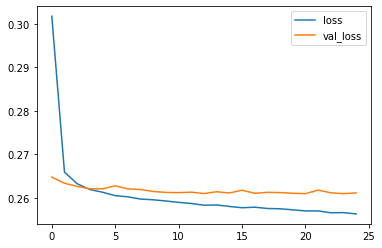

In [333]:
losses[['loss','val_loss']].plot()

In [334]:
from sklearn.metrics import classification_report,confusion_matrix

In [335]:
predictions=model.predict_classes(X_test)

C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [336]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [337]:
confusion_matrix(y_test,predictions)

array([[ 6889,  8769],
       [  117, 63269]], dtype=int64)

# Given the customer below, would i offer this person a loan?

In [338]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
dti                    30.11
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [339]:
model.predict_classes(new_customer.values.reshape(1,78))

C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

# Now check, did this person actually end up paying back their loan?

In [340]:
df.iloc[random_ind]['loan_repaid']

1.0

Finally , we have predicted a brand new customers loan repayment using artificial neural networks, with an accuracy of 89 %